### Importing libraries and CSV file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan = pd.read_csv('loan_details.csv')
personal = pd.read_csv('personal_details.csv')
emp = pd.read_csv('Employment_details.csv')

### Merging CSV files

In [2]:
tk = pd.merge(personal, loan, left_on= ['Id'] , right_on= ['Id'] , how = 'inner').merge(emp, on = ['Id'])

### Renaming all columns 

In [3]:
mapper = {'Gender' : 'gender' , 'Marital Status' : 'marital_status' , 'Family members' : 'family_members' , 
          'Status of education' : 'education' , 'LoanAmount applied for (in thoudands)' : 'loan_applied',
         'Loan_Amount_Duration' : 'loan_duration' , 'Credit_History' : 'credit_history' ,  'Property_Area' : 'property_area',
         'Loan_Status' : 'loan_status' , 'Income of applicant' : 'income_of_applicant',
         'Income of coapplicant' : 'income_of_coapplicant' , 'Self_Employed' : 'self_employed' , 'Id' : 'id'}

tk.rename(columns = mapper , inplace = True)

### Viewing the dataset after merging and renaming

In [4]:
tk.head()

,id,gender,marital_status,family_members,education,loan_applied,loan_duration,credit_history,property_area,loan_status,self_employed,income_of_applicant,income_of_coapplicant
0,1,Male,Yes,2,Not Graduate,156.0,360.0,1.0,Rural,N,No,1166,1053
1,2,Male,Yes,0,Graduate,186.0,400.0,1.0,Rural,Y,No,4689,3261
2,3,Female,Yes,3+,Graduate,50.0,360.0,1.0,Urban,N,No,21730,0
3,4,Male,Yes,1,Not Graduate,95.0,360.0,1.0,Urban,Y,NaN,8333,0
4,5,Male,No,0,Not Graduate,90.0,180.0,1.0,Urban,N,No,2795,0


### Looking at the data type

In [5]:
tk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47856 entries, 0 to 47855
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47856 non-null  int64  
 1   gender                 46676 non-null  object 
 2   marital_status         47856 non-null  object 
 3   family_members         46615 non-null  object 
 4   education              47856 non-null  object 
 5   loan_applied           45660 non-null  float64
 6   loan_duration          46367 non-null  float64
 7   credit_history         44409 non-null  float64
 8   property_area          47856 non-null  object 
 9   loan_status            47856 non-null  object 
 10  self_employed          45311 non-null  object 
 11  income_of_applicant    47856 non-null  int64  
 12  income_of_coapplicant  47856 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


### Looking at the null values present in the dataset

In [6]:
tk.isnull().sum()

id                          0
gender                   1180
marital_status              0
family_members           1241
education                   0
loan_applied             2196
loan_duration            1489
credit_history           3447
property_area               0
loan_status                 0
self_employed            2545
income_of_applicant         0
income_of_coapplicant       0
dtype: int64

### Dropping the duplicates (if any)

In [7]:
tk.drop_duplicates(inplace = True)

### Looking at the total numbers of the columns and rows

In [8]:
tk.shape

(47856, 13)

### Removing unwanted value from a 'family_members' column

In [9]:
tk['family_members'].replace('3+' , '3' , inplace = True)

### Imputing the null values using mean and median

In [10]:
tk['gender'] = tk['gender'].fillna(tk['gender'].mode()[0])

tk['family_members'] = tk['family_members'].fillna(tk['family_members'].mode()[0])

tk['credit_history'] = tk['credit_history'].fillna(tk['credit_history'].mode()[0])

tk['self_employed'] = tk['self_employed'].fillna(tk['self_employed'].mode()[0])

In [11]:
tk['loan_applied'].fillna('0' , inplace = True)
tk['loan_applied'] = tk['loan_applied'].astype('int64')
tk['loan_applied'] = tk['loan_applied'].replace(0, tk['loan_applied'].median())

In [12]:
tk['loan_duration'].fillna('0' , inplace = True)
tk['loan_duration'] = tk['loan_duration'].astype('int64')
tk['loan_duration'] = tk['loan_duration'].replace(0, tk['loan_duration'].mean())

### The null values imputed

In [13]:
tk.isnull().sum()

id                       0
gender                   0
marital_status           0
family_members           0
education                0
loan_applied             0
loan_duration            0
credit_history           0
property_area            0
loan_status              0
self_employed            0
income_of_applicant      0
income_of_coapplicant    0
dtype: int64

### Looking at the data type

In [14]:
tk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47856 entries, 0 to 47855
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47856 non-null  int64  
 1   gender                 47856 non-null  object 
 2   marital_status         47856 non-null  object 
 3   family_members         47856 non-null  object 
 4   education              47856 non-null  object 
 5   loan_applied           47856 non-null  int64  
 6   loan_duration          47856 non-null  float64
 7   credit_history         47856 non-null  float64
 8   property_area          47856 non-null  object 
 9   loan_status            47856 non-null  object 
 10  self_employed          47856 non-null  object 
 11  income_of_applicant    47856 non-null  int64  
 12  income_of_coapplicant  47856 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


### Changing the data type

In [15]:
tk['family_members'] = tk['family_members'].astype('int64')
tk['credit_history'] = tk['credit_history'].astype('int64')

### After replacing data type, looking at the results

In [16]:
tk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47856 entries, 0 to 47855
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     47856 non-null  int64  
 1   gender                 47856 non-null  object 
 2   marital_status         47856 non-null  object 
 3   family_members         47856 non-null  int64  
 4   education              47856 non-null  object 
 5   loan_applied           47856 non-null  int64  
 6   loan_duration          47856 non-null  float64
 7   credit_history         47856 non-null  int64  
 8   property_area          47856 non-null  object 
 9   loan_status            47856 non-null  object 
 10  self_employed          47856 non-null  object 
 11  income_of_applicant    47856 non-null  int64  
 12  income_of_coapplicant  47856 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 5.1+ MB


### Printing 5 rows just to ensure that all the changes took place correctly

In [17]:
tk.head()

,id,gender,marital_status,family_members,education,loan_applied,loan_duration,credit_history,property_area,loan_status,self_employed,income_of_applicant,income_of_coapplicant
0,1,Male,Yes,2,Not Graduate,156,360.0,1,Rural,N,No,1166,1053
1,2,Male,Yes,0,Graduate,186,400.0,1,Rural,Y,No,4689,3261
2,3,Female,Yes,3,Graduate,50,360.0,1,Urban,N,No,21730,0
3,4,Male,Yes,1,Not Graduate,95,360.0,1,Urban,Y,No,8333,0
4,5,Male,No,0,Not Graduate,90,180.0,1,Urban,N,No,2795,0


### Detecting outliers in numeric columns

In [18]:
numeric_colums = tk.select_dtypes(include = 'number')
numeric_colums.head()

,id,family_members,loan_applied,loan_duration,credit_history,income_of_applicant,income_of_coapplicant
0,1,2,156,360.0,1,1166,1053
1,2,0,186,400.0,1,4689,3261
2,3,3,50,360.0,1,21730,0
3,4,1,95,360.0,1,8333,0
4,5,0,90,180.0,1,2795,0


Outliers in *** id *** column


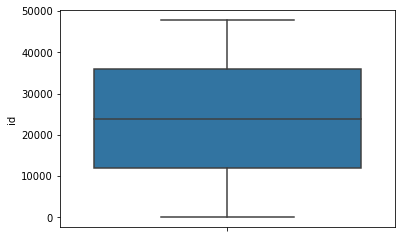

_______________________________________________________________________________
Outliers in *** family_members *** column


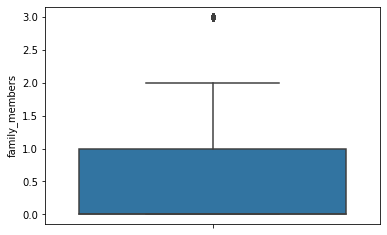

_______________________________________________________________________________
Outliers in *** loan_applied *** column


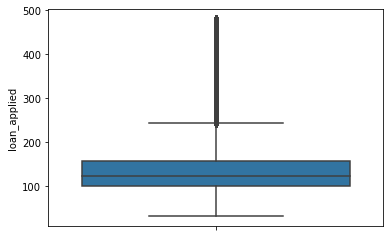

_______________________________________________________________________________
Outliers in *** loan_duration *** column


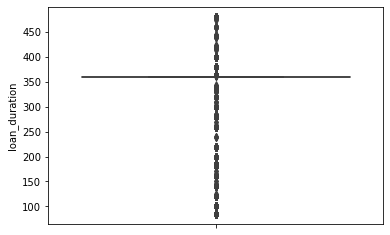

_______________________________________________________________________________
Outliers in *** credit_history *** column


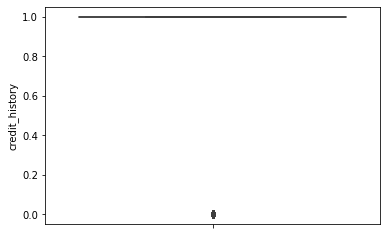

_______________________________________________________________________________
Outliers in *** income_of_applicant *** column


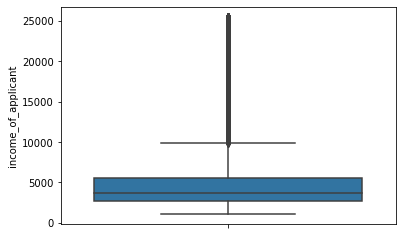

_______________________________________________________________________________
Outliers in *** income_of_coapplicant *** column


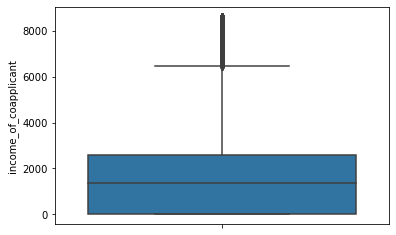

_______________________________________________________________________________


In [19]:
for i in numeric_colums:
    print('Outliers in ***' , i , '*** column')
    sns.boxplot(y = tk[i])
    plt.show()
    
    print('_______________________________________________________________________________')

### Creating dummy variables

In [22]:
tk_dummies = pd.get_dummies(tk, columns = ['gender' , 'marital_status' , 'education' , 'property_area' , 'loan_status' , 
                                           'self_employed'],
                           drop_first = True) 
#dummy_na = True

In [23]:
tk_dummies

,id,family_members,loan_applied,loan_duration,credit_history,income_of_applicant,income_of_coapplicant,gender_Male,marital_status_Yes,education_Not Graduate,property_area_Semiurban,property_area_Urban,loan_status_Y,self_employed_Yes
0,1,2,156,360.0,1,1166,1053,1,1,1,0,0,0,0
1,2,0,186,400.0,1,4689,3261,1,1,0,0,0,1,0
2,3,3,50,360.0,1,21730,0,0,1,0,0,1,0,0
3,4,1,95,360.0,1,8333,0,1,1,1,0,1,1,0
4,5,0,90,180.0,1,2795,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47851,47852,0,171,360.0,1,2073,4647,1,1,0,1,0,1,0
47852,47853,3,30,360.0,1,3026,0,1,1,1,1,0,1,0
47853,47854,0,132,360.0,1,5875,0,0,0,0,0,0,1,0
47854,47855,3,100,180.0,1,2518,5000,1,1,0,0,1,1,0


### Printing to better understand dummy variable easily

In [24]:
tk.head()

,id,gender,marital_status,family_members,education,loan_applied,loan_duration,credit_history,property_area,loan_status,self_employed,income_of_applicant,income_of_coapplicant
0,1,Male,Yes,2,Not Graduate,156,360.0,1,Rural,N,No,1166,1053
1,2,Male,Yes,0,Graduate,186,400.0,1,Rural,Y,No,4689,3261
2,3,Female,Yes,3,Graduate,50,360.0,1,Urban,N,No,21730,0
3,4,Male,Yes,1,Not Graduate,95,360.0,1,Urban,Y,No,8333,0
4,5,Male,No,0,Not Graduate,90,180.0,1,Urban,N,No,2795,0
